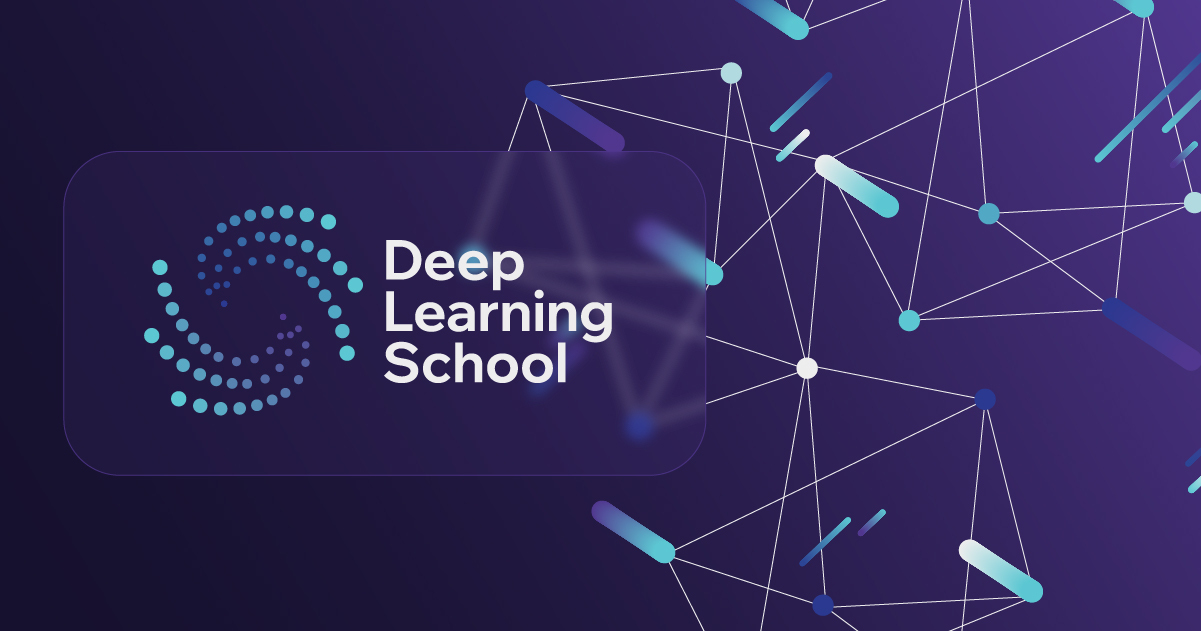

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

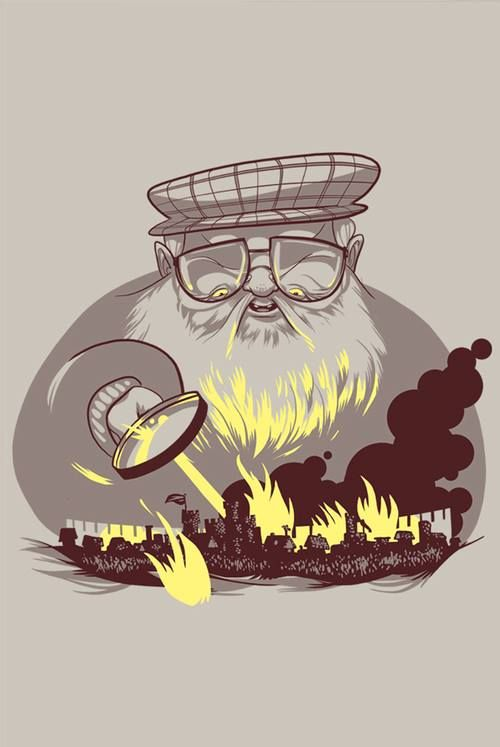

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 45.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 68.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv("game_of_thrones_train.csv", index_col='S.No')

In [4]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


Посмотрите, какие типы данных представлены в нашем датасете

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- для удобства восприятия транспонируем таблицу

In [6]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [7]:
data.describe(exclude = ['object']).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [8]:
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

,0
mother,0.988439
isAliveMother,0.988439
heir,0.986513
isAliveHeir,0.986513
father,0.985870
isAliveFather,0.985870
spouse,0.871548
isAliveSpouse,0.871548
dateOfBirth,0.820809
age,0.820809


В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



In [9]:
data.drop(columns=['mother', 'isAliveMother', 'heir', 'isAliveHeir', 'father', 'isAliveFather', 'spouse', 'isAliveSpouse', 'dateOfBirth', 'name', 'house'], inplace = True)

Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем). Большинство признаков с высоким процентом пропусков можно выбросить, потому что они не несут никакой информативности.

Ниже мы посмотрим, как можно работать с оставишимися признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

<Axes: xlabel='popularity', ylabel='Count'>

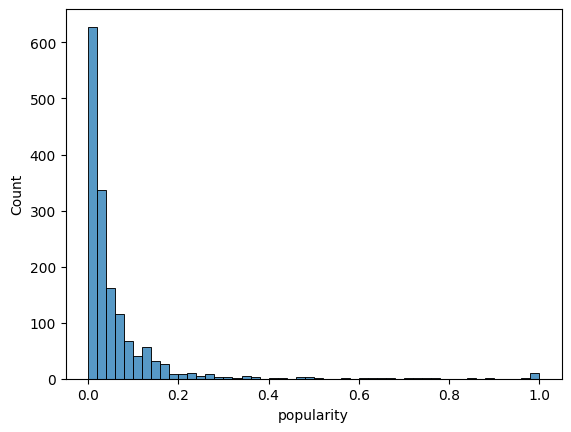

In [10]:
sns.histplot(data=data,x='popularity',bins=50)

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


In [11]:
data["popularity"] = np.log10(data["popularity"]*50+1)

<Axes: xlabel='popularity', ylabel='Count'>

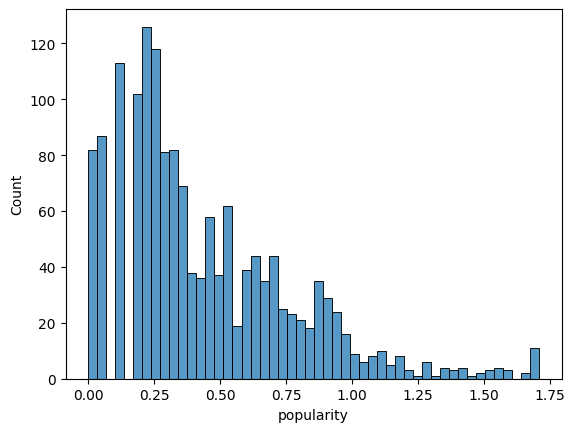

In [12]:
sns.histplot(data=data,x='popularity',bins=50)

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

In [13]:
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [14]:
data['age_value'] = [0 if np.isnan(x) else x for x in data['age']]
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

In [15]:
data = data.drop('age', axis=1)

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [16]:
data['culture'].value_counts(dropna=False)

,count
culture,
NaN,1069
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17


Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [17]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [18]:
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
    cultures_grouped_inverted.update({v:k})

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [19]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted).fillna('culture_no_data')

In [20]:
data = data.drop('culture',axis=1)

Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

Проделаем аналогичную работу над признаком title

In [21]:
data['title'].value_counts(dropna=False)

,count
title,
NaN,840
Ser,306
Maester,29
Archmaester,21
Lord,19
...,...
Lord of Hellholt,1
Red Flower Vale,1
Lord of Harrenhal,1


In [22]:
data['title'].unique()

array([nan, 'Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', 'Blackc

In [23]:
titles_grouped = {
    "Lord": ["lord", "lord commander of the night's watch", "lord of atranta", "lord of coldmoat",
             "lord of crows nest", "lord of darry", "lord of dragonstone", "lord of flints finger",
             "lord of greyshield", "lord of harrenhal", "lord of hellholt", "lord of honeyholt",
             "lord of iron holt", "lord of kingsgrave", "lord of oldcastle", "lord of pebbleton",
             "lord of southshield", "lord of starfall", "lord of sunflower hall", "lord of the crossing",
             "lord of the deep den", "lord of the iron islands", "lord of the marches",
             "lord of the red dunes", "lord of the snakewood",
             "lord of the ten towerslord harlaw of harlawharlaw of harlaw",
             "lord of the tides", "lord of the tor", "lord paramount of the mander",
             "lord paramount of the trident", "lord reaper of pyke", "lord seneschal",
             "lord steward of the iron islands", "lordsport"],
    "KingQueen": ["king", "king-beyond-the-wall", "king in the north", "king of astapor",
                  "king of the andals", "king of the iron islands", "queen", "queenblack bride"],
    "Knight": ["knight", "knight of griffins roost"],
    "Lady": ["lady", "lady marya", "lady of darry", "lady of torrhens square",
             "ladyqueen", "ladyqueendowager queen"],
    "Master": ["master-at-arms", "master of coin", "master of deepwood motte",
               "master of harlaw hall", "master of ships"],
    "Prince": ["prince", "prince of dorne", "prince of dragonstone",
               "prince of winterfell", "princess", "princessqueen", "princesssepta"],
    "Other": ["acorn hall", "archmaester", "ashford", "banefort", "big bucketthe wull",
              "bitterbridge", "blackcrown", "blackmont", "bloodrider", "blue grace",
              "brightwater", "broad arch", "brother", "brotherproctor", "captain",
              "captain of the guard", "castellan", "castellancommander",
              "casterly rock", "castle lychester", "cerwyn", "chief undergaoler",
              "claw isle", "cobblecat", "coldmoat", "coldwater burn",
              "commander of the second sons", "crag", "crakehall", "cupbearer",
              "deepwood motte", "dragonstone", "duskendale", "dyre den",
              "eastwatch-by-the-sea", "eyrie", "fair isle", "feastfires",
              "felwood", "first ranger", "first sword of braavos", "foamdrinker",
              "ghost hill", "godsgrace", "golden tooth", "goldengrove",
              "goldgrass", "good master", "goodman", "goodwife", "grand maester",
              "grassy vale", "greenstone", "greenshield", "grey glen",
              "gulltown", "hand of the king", "harridan hill", "hayford",
              "hearts home", "high steward of highgarden", "highgarden",
              "hightower", "hornvale", "hornwood", "ironoaks", "karhold",
              "karls hold", "kayce", "khal", "khalakka", "khalko (formerly)",
              "last hearth", "light of the west", "longbow hall", "longsister",
              "maester", "magister of pentos", "maidenpool",
              "mistress of whisperers", "nightsong", "oarmaster", "pinkmaiden",
              "protector of the realm", "rain house", "red flower vale",
              "red hand", "red priest", "redfort", "rills", "riverrun",
              "rooks rest", "runestone", "salt shore", "sandstone", "seagard",
              "sealord", "sealskin point", "seneschal", "septa", "septon",
              "ser", "serthe knight of saltpans", "seven kingdoms", "sharp point",
              "shatterstone", "skyreach", "starpike", "steward", "stokeworth",
              "stonehelm", "strongsong", "sweetport sound", "sweetsister",
              "ten towers", "the liddlelord liddle", "three sisters",
              "three towers", "tower of glimmering", "tradesman-captain",
              "undergaoler", "uplands", "volmark", "widows watch",
              "whitewalls", "wind witch", "winterfell", "wisdom", "wraith",
              "wyndhall", "yronwood"]
}

In [24]:
titles_grouped_inverted = {}
for k in titles_grouped.keys():
  for v in titles_grouped[k]:
    titles_grouped_inverted.update({v:k})

In [25]:
data['titles_grouped'] = data['title'].str.lower().map(titles_grouped_inverted).fillna('title_no_data')

In [26]:
data = data.drop('title',axis=1)

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [27]:
# Количество уникальнх значений в каждом столбце
data.nunique()

,0
male,2
book1,2
book2,2
book3,2
book4,2
book5,2
isMarried,2
isNoble,2
numDeadRelations,14
popularity,117


In [28]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(exclude = ['object']).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.00000,2
book1,1557.0,0.0,1.00000,2
book2,1557.0,0.0,1.00000,2
book3,1557.0,0.0,1.00000,2
book4,1557.0,0.0,1.00000,2
book5,1557.0,0.0,1.00000,2
isMarried,1557.0,0.0,1.00000,2
isNoble,1557.0,0.0,1.00000,2
numDeadRelations,1557.0,0.0,15.00000,14
popularity,1557.0,0.0,1.70757,117


In [29]:
data.sample(5)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped,titles_grouped
S.No,,,,,,,,,,,,,,,,
338,1,0,1,0,0,0,0,0,0,0.067154,1,0,0.0,1,culture_no_data,title_no_data
1212,1,0,0,1,1,1,0,1,0,0.501595,1,0,22.0,0,the Iron Islands,Other
432,0,0,0,0,0,1,1,1,10,0.754522,0,1,100.0,0,culture_no_data,Prince
1366,1,0,0,0,1,1,0,1,0,0.620891,1,0,0.0,1,the Iron Islands,Master
398,0,0,1,0,0,0,0,0,0,0.222429,1,0,0.0,1,the North,title_no_data


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [31]:
data.sample(15)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped,titles_grouped
S.No,,,,,,,,,,,,,,,,
1394,1,0,0,1,1,1,1,1,0,0.301756,1,0,0.0,1,culture_no_data,Other
793,0,0,0,0,0,0,0,0,0,0.000000,1,0,0.0,1,culture_no_data,title_no_data
952,1,0,0,0,0,1,0,1,0,0.222429,1,0,0.0,1,culture_no_data,Other
122,1,0,0,0,1,0,0,0,0,0.478089,1,0,19.0,0,culture_no_data,title_no_data
1293,1,1,1,1,1,0,0,0,0,0.336574,1,0,0.0,1,the North,title_no_data
85,1,0,0,0,0,0,1,1,3,0.767119,0,1,42.0,0,Old Nations,Prince
383,0,0,0,0,0,1,0,0,0,0.176575,1,0,0.0,1,Other Nations,title_no_data
236,1,0,0,0,1,0,0,1,0,0.222429,1,0,0.0,1,culture_no_data,Other
551,0,0,0,1,1,0,0,0,0,0.125302,1,0,0.0,1,Other Nations,title_no_data


In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['culture_grouped', 'titles_grouped']

ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat_ohe = ohe.fit_transform(data[cat_cols])

ohe_cols = ohe.get_feature_names_out(cat_cols)
df_cat_ohe = pd.DataFrame(X_cat_ohe, columns=ohe_cols, index=data.index)

data = pd.concat([
    data.drop(columns=cat_cols),
    df_cat_ohe
], axis=1)

In [33]:
data

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,...,culture_grouped_the Reach,culture_grouped_the Rock,culture_grouped_the Stormlands,titles_grouped_Knight,titles_grouped_Lady,titles_grouped_Lord,titles_grouped_Master,titles_grouped_Other,titles_grouped_Prince,titles_grouped_title_no_data
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,11,1.495094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,1,1,1,1,1,1,1,1.661018,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1,0,0,1,0,1.157696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0,0,1,1,0,1.008486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,1,0,1,1,0,0.501595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,0,0.955532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1554,0,1,1,0,0,0,0,0,0,0.478089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1555,1,0,1,1,1,1,0,0,0,0.685397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

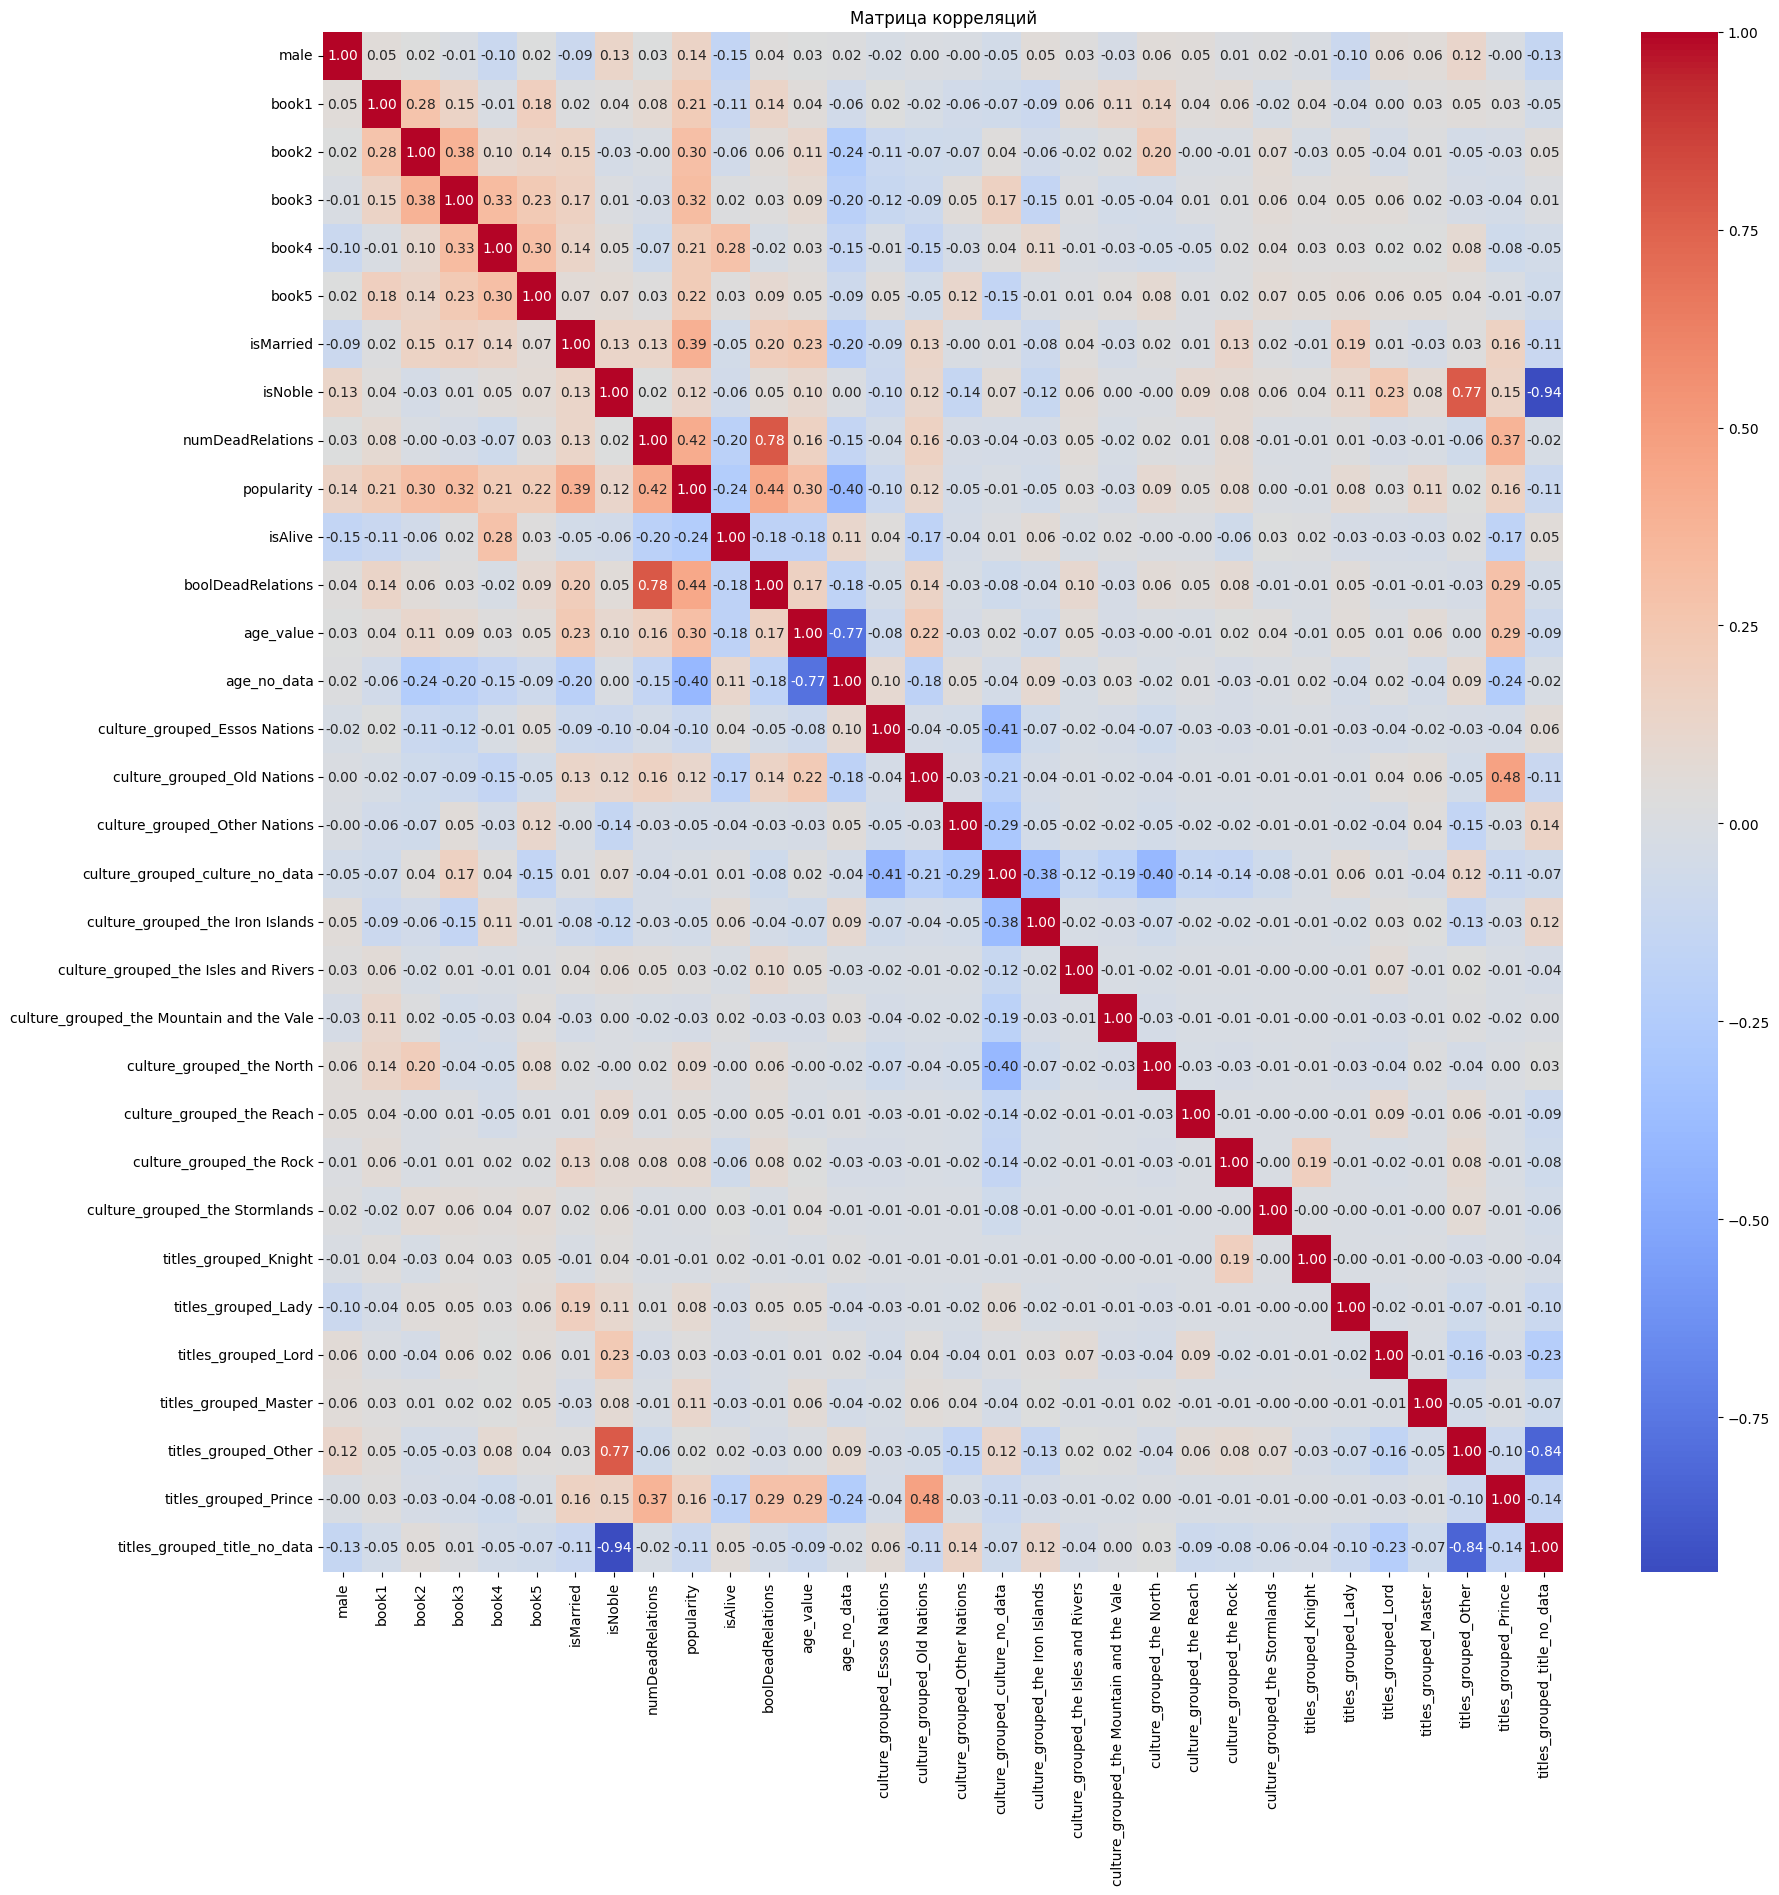

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm',annot=True,fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [35]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вы можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [39]:
model = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [3000, 4000]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model_logistic_regression = grid_search.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [40]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [41]:
y_pred = best_model_logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [42]:
data_test = pd.read_csv("game_of_thrones_test.csv", index_col='S.No')

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [43]:
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,NaN,0,Lysene,278279.0,NaN,NaN,NaN,House Targaryen,NaN,...,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0.110368
1869,Rhaego,NaN,0,NaN,298299.0,NaN,NaN,NaN,House Targaryen,NaN,...,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,0.167224


In [44]:
data_test.loc[1685, 'dateOfBirth'] = 278.
data_test.loc[1685, 'age'] = 0
data_test.loc[1869, 'dateOfBirth'] = 299.
data_test.loc[1869, 'age'] = 0

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

In [45]:
data_test.drop(columns=['mother', 'isAliveMother', 'heir', 'isAliveHeir', 'father', 'isAliveFather', 'spouse', 'isAliveSpouse', 'dateOfBirth', 'name', 'house'], inplace = True)

In [46]:
data_test["popularity"] = np.log10(data_test["popularity"]*50+1)

In [47]:
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)

In [48]:
data_test['age_value'] = [0 if np.isnan(x) else x for x in data_test['age']]
data_test['age_no_data'] = [1 if np.isnan(x) else 0 for x in data_test['age']]

In [49]:
data_test = data_test.drop('age', axis=1)

In [50]:
data_test['culture_grouped'] = data_test['culture'].str.lower().map(cultures_grouped_inverted).fillna('culture_no_data')
data_test = data_test.drop('culture',axis=1)

In [51]:
data_test['titles_grouped'] = data_test['title'].str.lower().map(titles_grouped_inverted).fillna('title_no_data')
data_test = data_test.drop('title',axis=1)

In [52]:
cat_cols = ['culture_grouped', 'titles_grouped']

ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat_ohe = ohe.fit_transform(data_test[cat_cols])

ohe_cols = ohe.get_feature_names_out(cat_cols)
df_cat_ohe = pd.DataFrame(X_cat_ohe, columns=ohe_cols, index=data_test.index)

data_test = pd.concat([
    data_test.drop(columns=cat_cols),
    df_cat_ohe
], axis=1)

In [53]:
y_data_test = best_model_logistic_regression.predict(data_test)
y_data_test_df = pd.DataFrame(y_data_test, columns=['isAlive'], index=data_test.index)

In [54]:
y_data_test_df.to_csv("/content/new_submission.csv", index=False)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [55]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.33MB/s]


In [56]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [57]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [58]:
submission.to_csv("/content/new_submission.csv", index=False)

Результат:

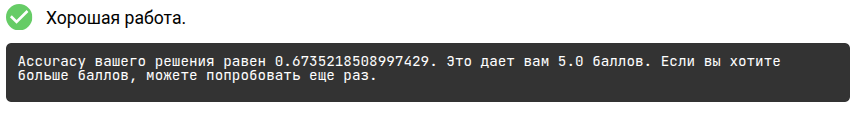